In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Initializing the variables

x = 0.5      # Length of the rod in m
k = 41       # Thermal conductivity in W/mK
q = 1E5     # Volumetric rate of heat generation in W/m^3
nx = 10      # No. of divisions
dx = x/(nx-1) # Each division length
print(q, dx)

100000.0 0.05555555555555555


In [102]:
# Forming the grid

xarr = np.linspace(0,x,nx)     # An array of the x-values
T = np.zeros(nx)               # An array of the initial temperatures
print(xarr, T)

[0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5       ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [103]:
# Applying the boundary conditions

T[0] =  0   # Applying the left boundary condition
T[-1] = 10   # Applying the right boundary condition
#T[1:-1] = 200 # Initial guess of 200
print(T)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]


### Discretizing the equation 

The given equation is $$\frac{d^2T}{dx^2} + \frac{\dot{q}}{k} = 0$$

Discretizing this equation using the finite difference method gives: $$ \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2} = \frac{-\dot{q}}{k} $$

Which gives: $$ T_i = \frac{T_{i+1} + T_{i-1} + \frac{\dot{q}\Delta x^2}{k}}{2}$$

### Solving the problem using Gauss-Seidel Method 

In [104]:
# Defining the function for Gauss-Seidel method

def GaussSeidel(u, err, nt):
    for t in range(nt):
        un = u.copy()
        for i in range(1,nx-1):
            u[i] = 0.5*(u[i+1] + u[i-1] + q*dx**2/k)
        
        print(u)
        plt.plot(xarr, u)
            
        if (abs(u-un)<err).all():
            print("Pre-final temperature distribution: ", un)
            print("\n")
            print("Final iteration %d"% t)
            print("Temperature distribution: ", u)
            break    

[ 0.          3.76392653  5.64588979  6.58687142  7.05736224  7.29260765
  7.41023035  7.4690417  12.49844738 10.        ]
[ 0.          6.58687142 10.35079795 12.46800662 13.64423366 14.29115854
 14.64402665 17.33516354 17.4315083  10.        ]
[ 0.          8.9393255  14.46759259 17.81983966 19.81942562 20.99565266
 22.92933463 23.94434799 20.73610053 10.        ]
[ 0.         10.99772282 18.17270777 22.75999322 25.64174947 28.04946858
 29.76083482 29.0123942  23.27012363 10.        ]
[ 0.         12.85028041 21.56906335 27.36933294 31.47332729 34.38100758
 35.46062742 33.12930205 25.32857755 10.        ]
[ 0.         14.5484582  24.7228221  31.86200122 36.88543093 39.9369557
 40.2970554  36.57674301 27.05229803 10.        ]
[ 0.         16.12533758 27.75759593 36.08543996 41.77512436 44.80001641
 44.45230624 39.51622866 28.52204086 10.        ]
[ 0.         17.64272449 30.62800875 39.96549308 46.14668127 49.06342028
 48.053751   42.05182246 29.78983776 10.        ]
[ 0.         19.0

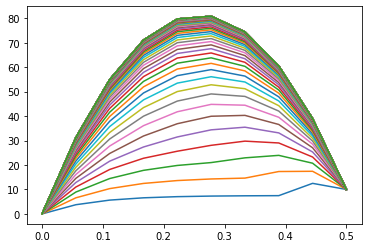

In [105]:
GaussSeidel(T, 1E-5, 1000)

### Solving the problem using TDMA method

In [106]:
def TDMA(a, b, c, d):
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
            
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [107]:
def TDMAAlgo(a,b,c,d):
    n = len(d)
    w = np.zeros(n-1,float)
    g = np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

In [108]:
a = [1]*7
b = [-2]*8
c = [1]*7
d = [-q*dx**2/k]*7 + [-q*dx**2/k - 10]
print(a,"\n", b, "\n", c, "\n", d)

[1, 1, 1, 1, 1, 1, 1] 
 [-2, -2, -2, -2, -2, -2, -2, -2] 
 [1, 1, 1, 1, 1, 1, 1] 
 [-7.527853056308341, -7.527853056308341, -7.527853056308341, -7.527853056308341, -7.527853056308341, -7.527853056308341, -7.527853056308341, -17.52785305630834]


In [109]:
final = np.array([[0,0,0,0,0,0,0,0]])
error = 1E-5

T_comp = TDMAAlgo(a,b,c,d)
print(T_comp)

[31.22252334 54.91719362 71.08401084 79.72297501 80.83408612 74.41734417
 60.47274917 39.00030111]


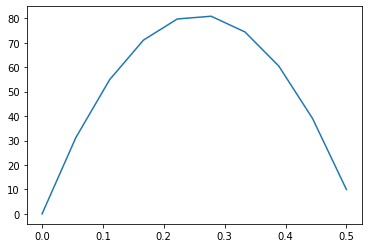

In [111]:
plt.plot(xarr, [0] + list(T_comp) + [10])